In [1]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
#pio.renderers.default = 'colab'   # try changing this in case your plots aren't shown
import pandas as pd
from urllib.request import urlopen
import json

zurich_household_income = pd.read_csv('zurich_household_income_ytd_median.csv')
zurich_indiv_income = pd.read_csv('zurich_indiv_income_ytd_median.csv')
zurich_personal_asset = pd.read_csv('zurich_personal_asset_ytd_median.csv')
zurich_popul = pd.read_csv('zurich_popul_ytd_sum.csv')

with open("zh_json.json") as response:
    geo_data = json.load(response)

In [4]:
zurich_popul

Unnamed: 0     QuarLang  AlterV10Sort SexLang Ziv2Lang  AnzBestWir
0              0    Affoltern             1    Male   Single        1549
1              1    Affoltern             1  Female   Single        1470
2              2    Affoltern             2    Male   Single        1378
3              3    Affoltern             2  Female   Single        1238
4              4    Affoltern             2  Female  Married           2
...          ...          ...           ...     ...      ...         ...
2783        2783  Wollishofen            10  Female  Married          19
2784        2784  Wollishofen            10  Female  Widowed         125
2785        2785  Wollishofen            11    Male  Widowed           2
2786        2786  Wollishofen            11  Female   Single           3
2787        2787  Wollishofen            11  Female  Widowed           7

[2788 rows x 6 columns]

In [2]:
zurich_popul_bySex = (
    zurich_popul.groupby(["QuarLang", "SexLang"])
    .agg("sum")
    .reset_index()
)
zurich_popul_bySex.drop(['AlterV10Sort'], inplace=True, axis=1, errors='ignore')
zurich_popul_bySex

QuarLang SexLang  Unnamed: 0  AnzBestWir
0      Affoltern  Female        1881       13432
1      Affoltern    Male        1774       13503
2    Albisrieden  Female        6318       11601
3    Albisrieden    Male        6137       11274
4   Alt-Wiedikon  Female        8900        8819
..           ...     ...         ...         ...
63     Wipkingen    Male      113143        8259
64       Witikon  Female      111836        6137
65       Witikon    Male      100844        5265
66   Wollishofen  Female      123510       10610
67   Wollishofen    Male      120617        9960

[68 rows x 4 columns]

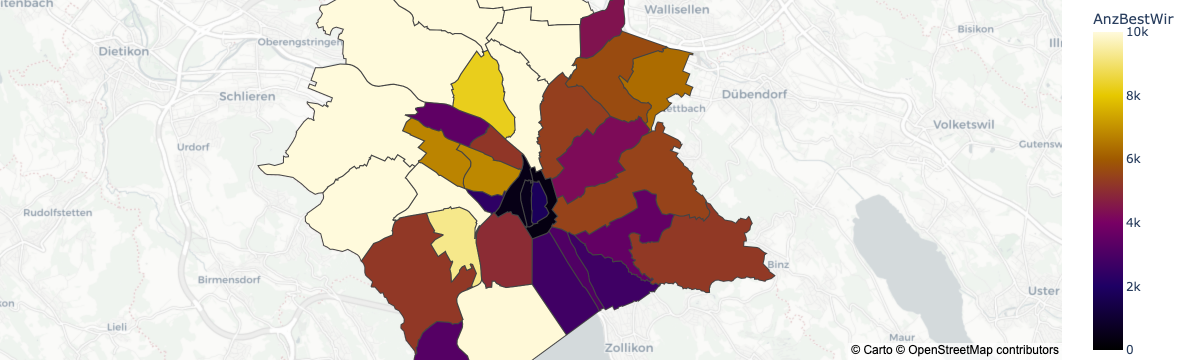

In [8]:
fig_zurich = px.choropleth_mapbox(zurich_popul_bySex, geojson=geo_data, color=zurich_popul_bySex['AnzBestWir'],
                           locations=zurich_popul_bySex['QuarLang'], featureidkey="properties.qname", 
                           color_continuous_scale='Electric', range_color=[0, 10000], 
                           hover_name=zurich_popul_bySex['QuarLang'] + zurich_popul_bySex['SexLang'])

fig_zurich.update_layout(mapbox_style="carto-positron", 
                   mapbox_zoom=11, mapbox_center = {"lat": 47.3769, "lon": 8.5417})
                   
fig_zurich.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_zurich.show()